<P> <img src="https://i.ibb.co/gyNf19D/nhslogo.png" alt="nhslogo" border="0" width="100" align="right"><font size="6"><b> CS4132 Data Analytics</b> </font>

# Lab 6: Data Exploration I (Univariate Data)

### Submission Instructions

* Complete the following questions and upload your `.ipynb` file to Coursemology.
* Name the file in the following format: `Lab<num><YourName>.ipynb`
* Before submitting, please ensure you click on "Kernel" > "Restart and Run All" on your jupyter notebook. 
* Finally, print a copy of your final solution to OneNote > Your Individual Student Notebook > Labs. Name the page `Lab <num>`.

## Q1

The dataset below contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer. We will use this dataset for this lab.

* Age of patient at time of operation (numerical)
* Patient's year of operation (year - 1900, numerical)
* Number of positive axillary nodes detected (numerical)
* Survival status (class attribute) 1 = the patient survived 5 years or longer, 2 = the patient died within 5 year

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
df = pd.read_csv('Lab6Q1.csv', header=None, names=['Age', 'Operation_year', 'axil_codes_det', 'Surv_status'])
df.head()

,Age,Operation_year,axil_codes_det,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


#### a) Which variables in this dataset are categorical and which are numerical?

<div class="alert alert-block alert-info">

Categorical:
- Surv_status
- Operation year

Numerical:
- Age
- axil_codes_det
    
</div>

#### b) We will perform univariate analysis on the 'Age' variable. 

i) Give the 5-number summary for Age.

In [20]:
#your solution
fivenumsum = df['Age'].describe().loc[['min', '25%', '50%', '75%', 'max']].to_frame()
fivenumsum

,Age
min,30.00
25%,44.00
50%,52.00
75%,60.75
max,83.00


ii) Calculate the range, IQR and if there are any outliers based on the 5-number summary above.

In [21]:
#your solution
IQR = fivenumsum.loc["75%", 'Age'] - fivenumsum.loc["25%", 'Age']
print(IQR)
df[(df.Age > fivenumsum.loc["75%", 'Age'] + IQR) | (df.Age < fivenumsum.loc["25%", 'Age'] - IQR)]

16.75


,Age,Operation_year,axil_codes_det,Surv_status
304,78,65,1,2
305,83,58,2,2


iii) Hence, state what insights can you gain from the 5-number summary. In particular, comment on center, shape, the spread of data and if there are any outliers.

<div class="alert alert-block alert-info">

- Centre: Median represents the middle value of the distribution
- Shape: The median as compared to the IQR and range can show whether the distribution is skewed
- Spread: IQR, which is 75th quantile - 25th quantile, can represent spread of data
- Outlier: Outliers can be determined if they are lower than 25th quantile - 3/2 IQR or higher than 75th quantile + 3/2 IQR
    
</div>

#### c) We will perform univariate analysis on the 'Survival Status' variable. 

i) Summarize the number of people who survived vs those who did not in a frequency table.

In [22]:
#your solution
live = df.Surv_status.value_counts()
live

1    225
2     81
Name: Surv_status, dtype: int64

ii) Plot the data using a pie chart. Give your chart a title.

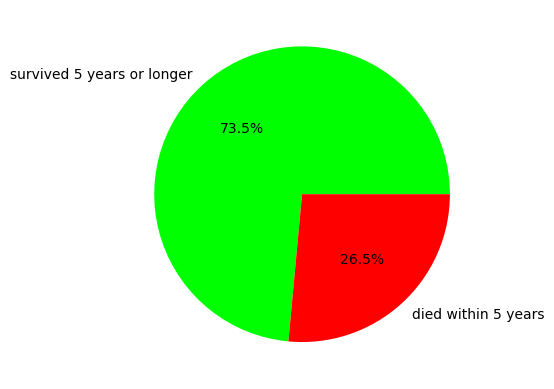

In [23]:
#your solution
plt.pie(
    x = live.values,
    labels = ['survived 5 years or longer', 'died within 5 years'],
    shadow = False,
    colors = ['Lime', 'Red'],
    startangle = 0,
    autopct='%1.1f%%',
    )
plt.show()

iii) Plot the data using a bar chart. Label your axis clearly. You should show the exact value of the bar on top of the respective bar.

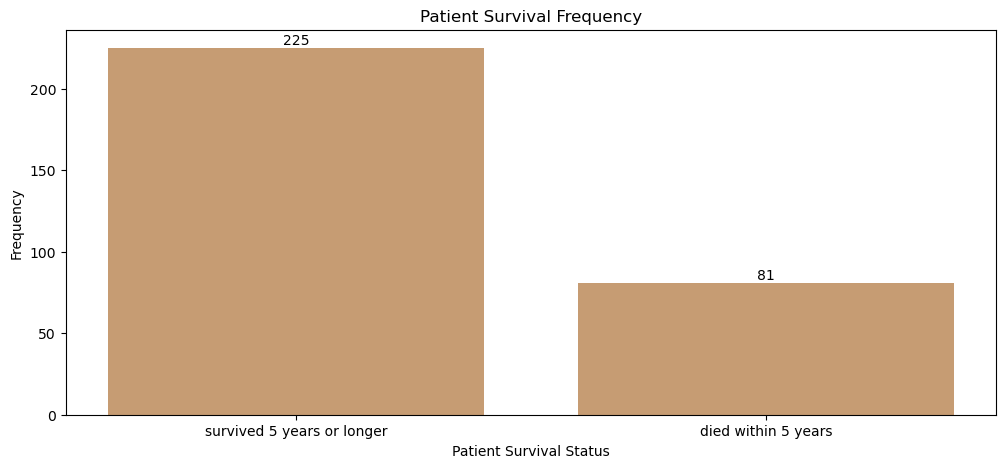

In [24]:
#your solution
data = live
plt.figure(figsize=(12, 5)) 
plt.bar(data.index, data.values, align='center', alpha=0.5)
plt.xlabel('Patient Survival Status')
plt.ylabel('Frequency')
plt.title('Patient Survival Frequency')
plt.xticks([1, 2], ['survived 5 years or longer', 'died within 5 years'])
bars = plt.bar(data.index, data.values, align='center', alpha=0.5)
for bar in bars: 
    yval = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width()/2, 
               yval + .5, int(yval), ha='center', va='bottom')
plt.show()

#### d) We would like to see the distribution of the number of people who died based on the age. Plot a relevant graph for this.

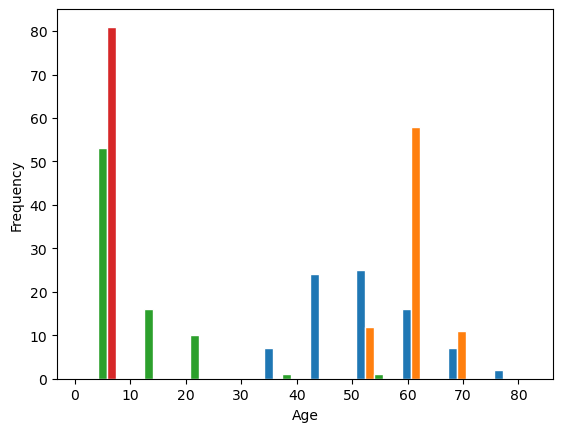

In [25]:
#your solution
plt.hist(df[df.Surv_status == 2], bins = 10, ec = 'white')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.show()

Hence, state what insights can you gain from the histogram drawn.

<div class="alert alert-block alert-info">

The majority of patients that did not survive more than 5 years after the surgery are either very young or very old (in the range of 0 - 10 year olds or 55 - 70 year olds)
    
</div>

#### e) Draw a side by side boxplot of people who surived and those who died. You should also display the median value on the median line in the boxplot.

Hint: Use the `.text()` function as outlined in section 6.3.2 Bar Chart.

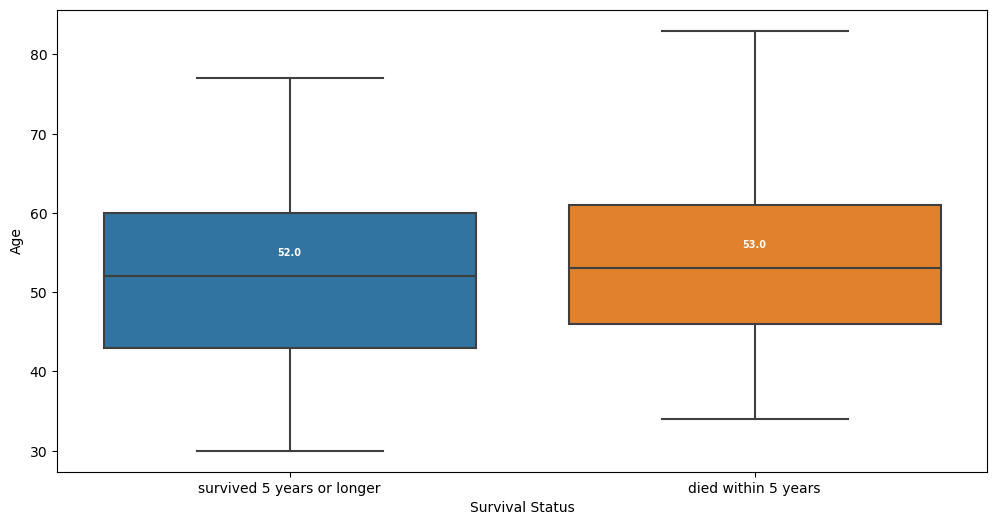

In [26]:
#your solution
#I plotted Age against survival status instead since it did not make sense to plot frequency for boxplot and violin plot
import seaborn as sns
plt.figure(figsize=(12,6))
boxplt = sns.boxplot(y = df.Age, x = df.Surv_status,  data = df)
plt.ylabel('Age')
plt.xlabel('Survival Status')
plt.xticks([0, 1], ['survived 5 years or longer', 'died within 5 years'])

medians = df.groupby(['Surv_status'])['Age'].median().to_list()
vertical_offset = df['Age'].median() * 0.05

for xtick in boxplt.get_xticks():
    boxplt.text(xtick, medians[xtick] + vertical_offset, medians[xtick], horizontalalignment = 'center', size = 'x-small', color = 'white', weight = 'bold')
plt.show()

#### f) Another common visualization similar to boxplot is the violin plot. 

i) Do a research on the violin plot and plot a violin plot similar to that in d). Note that there are a few variations in the violin plot based on parameters input. You should show each of them clearly and explain the differences. 

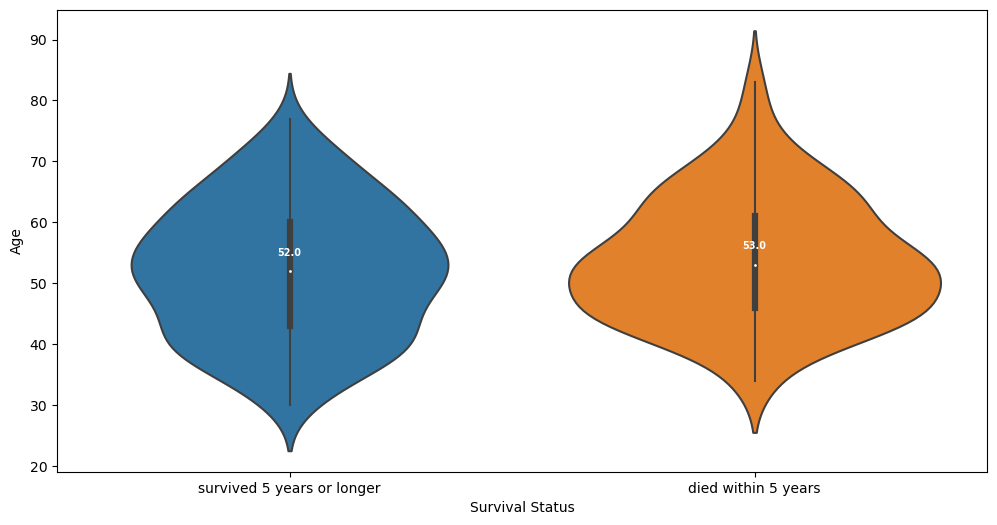

In [27]:
#your solution
import seaborn as sns
plt.figure(figsize=(12,6))
boxplt = sns.violinplot(y = df.Age, x = df.Surv_status,  data = df)
plt.ylabel('Age')
plt.xlabel('Survival Status')
plt.xticks([0, 1], ['survived 5 years or longer', 'died within 5 years'])

medians = df.groupby(['Surv_status'])['Age'].median().to_list()
vertical_offset = df['Age'].median() * 0.05

for xtick in boxplt.get_xticks():
    boxplt.text(xtick, medians[xtick] + vertical_offset, medians[xtick], horizontalalignment = 'center', size = 'x-small', color = 'white', weight = 'bold')
plt.show()

ii) Hence, explain the differences and similarities between boxplot and violinplot (when would one be preferred over the other).

<div class="alert alert-block alert-info">

You are unable to conclude whether there are outliers and how many outliers there are in a violinplot, but you can see the frequency of each value.

You would use a boxplot when you want to find outliers and a violinplot when you want to see the density of frequency of the distribution at a certain value

</div>

## Q2

The data below shows the age of the US presidents at their inaugurations.

In [28]:
import pandas as pd
import numpy as np
df2 = pd.read_csv('Lab6Q2.csv')
df2.head()

,President,Age
0,Washington,57
1,J. Adams,61
2,Jefferson,57
3,Madison,57
4,Monroe,58


#### a) Divide the range of the data into 6 classes of equal width. Count the number of observations in each class. To calculate the relative frequency, divide the frequency in each class by the total number of observations. You should store the data in a dataframe with 3 columns Class (i.e. interval), Frequency, Relative Frequency.

Sample output:
<table border="1" class="dataframe">
<thead>
<tr>
<th></th>
<th>Frequency</th>
<th>Relative Frequency</th>
</tr>
</thead>
<tbody>
<tr>
<td>40 &ndash; 44</td>
<td>2</td>
<td>0.045455</td>
</tr>
<tr>
<td>45 &ndash; 49</td>
<td>7</td>
<td>0.159091</td>
</tr>
</tbody>
</table>

In [29]:
#your solution
bin = np.linspace(40, 70, 6, endpoint = False).astype(int)
interval = pd.DataFrame(np.array([str(x) + " - " + str(x + 4) for x in bin]), columns = ['0'])
out = pd.DataFrame(np.unique(np.where((df2.Age >= bin[0]) & (df2.Age <= bin[1] - 1), interval.iloc[0], np.where((df2.Age >= bin[1]) & (df2.Age <= bin[2] - 1), interval.iloc[1], np.where((df2.Age >= bin[2]) & (df2.Age <= bin[3] - 1), interval.iloc[2], np.where((df2.Age >= bin[3]) & (df2.Age <= bin[4] - 1), interval.iloc[3], np.where((df2.Age >= bin[4]) & (df2.Age <= bin[5] - 1), interval.iloc[4], interval.iloc[5]))))), return_counts = True)[1], columns = ['Frequency'])
out = out.assign(Relative_Frequency = 0)
out.iloc[:, 1] = out.iloc[:, 0] / out.Frequency.sum()
out.columns = ['Frequency', 'Relative Frequency']
out.index = interval.to_numpy().flatten()
out

,Frequency,Relative Frequency
40 - 44,2,0.045455
45 - 49,7,0.159091
50 - 54,13,0.295455
55 - 59,12,0.272727
60 - 64,7,0.159091
65 - 69,3,0.068182


#### b) Plot a histogram with the class interval from (a)

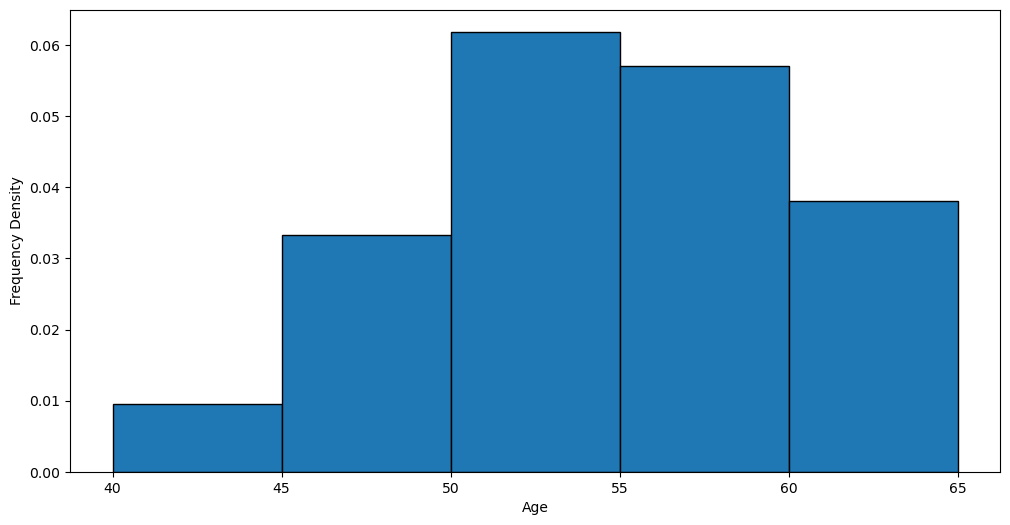

In [30]:
#your solution
plt.figure(figsize=(12,6))
plt.hist(df2.Age, bins = bin, ec = 'black', density = True)
plt.ylabel('Frequency Density')
plt.xlabel('Age')
plt.show()

#### c) Add in two columns on Cumulative Frequency and Relative Cumulative Frequency into the frequency table.

Sample output:
<table border="1" class="dataframe">
<thead>
<tr>
<th></th>
<th>Frequency</th>
<th>Relative Frequency</th>
<th>Cumulative Frequency</th>
<th>Relative Cumulative Frequency</th>
</tr>
</thead>
<tbody>
<tr>
<td>40 &ndash; 44</td>
<td>2</td>
<td>0.045455</td>
<td>2</td>
<td>0.045455</td>
</tr>
<tr>
<td>45 &ndash; 49</td>
<td>7</td>
<td>0.159091</td>
<td>9</td>
<td>0.204545</td>
</tr>
</tbody>
</table>

In [31]:
#your solution
out = out.assign(Cum = 0, RelCum = 0)
out.Cum = out.Frequency.cumsum()
out.RelCum = out['Relative Frequency'].cumsum()
out.columns = (out.columns[0], out.columns[1], 'Cumulative Frequency', 'Relative Cumulative Frequency')
out

,Frequency,Relative Frequency,Cumulative Frequency,Relative Cumulative Frequency
40 - 44,2,0.045455,2,0.045455
45 - 49,7,0.159091,9,0.204545
50 - 54,13,0.295455,22,0.500000
55 - 59,12,0.272727,34,0.772727
60 - 64,7,0.159091,41,0.931818
65 - 69,3,0.068182,44,1.000000


#### d) Plot a cumulative frequency histogram below.

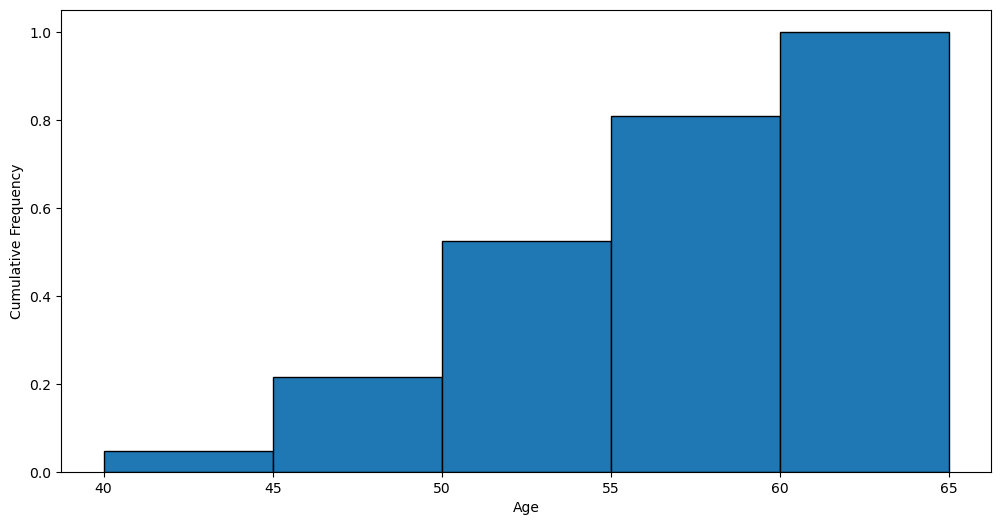

In [32]:
#your solution
plt.figure(figsize=(12,6))
plt.hist(df2.Age, bins = bin, ec = 'black', density = True, cumulative = True)
plt.ylabel('Cumulative Frequency')
plt.xlabel('Age')
plt.show()

#### e) Read up on <a href="https://cmdlinetips.com/2019/05/empirical-cumulative-distribution-function-ecdf-in-python/">Empirical cumulative distribution function (ECDF)</a> and plot a ECDF for the data given.

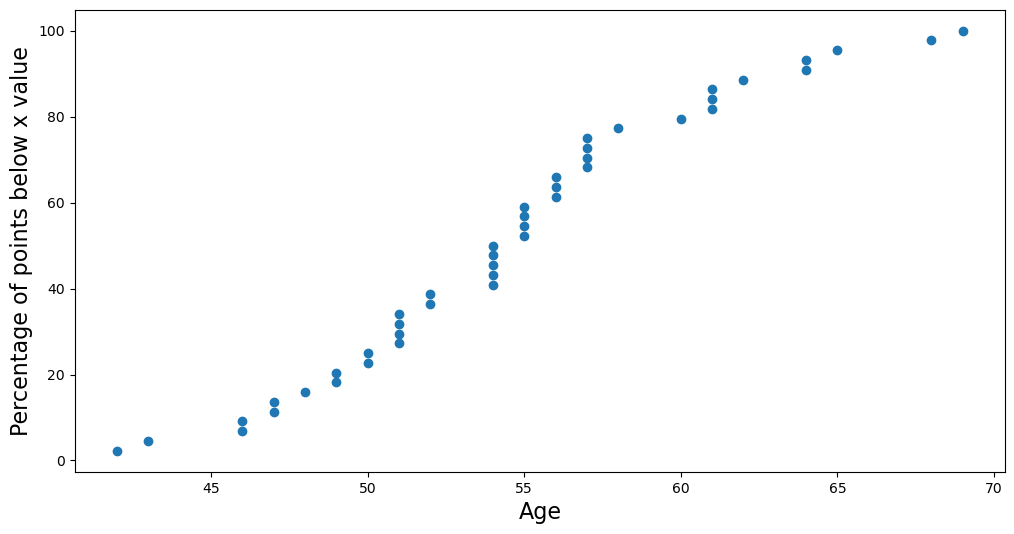

In [85]:
#your solution
size = df2.Age.sort_values().to_numpy().size
plt.figure(figsize=(12,6))
plt.scatter(x = df2.Age.sort_values().to_numpy(), y =  np.arange(1, size + 1) / size * 100)
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Percentage of points below x value', fontsize = 16)
plt.show()

Briefly explain your understanding of ECDF below.

<div class="alert alert-block alert-info">

It is a series of points on a graph, each of which denote the proportion of data points that are equal to or below a certain value in the given distribution, which represents the probability of any given data point being equal to or below said certain value.
    
</div>

In [79]:
obamaage = df2[df2.President.str.contains('Obama')].reset_index().Age[0]
len(df2[df2.Age < obamaage]) / len(df2) * 100

9.090909090909092

Hence, what percentage of US presidents were younger than Barack Obama when they were inaugurated?

<div class="alert alert-block alert-info">

9.09%
or by rough estimation from graph, ~10%
    
</div>